# Name: Arav Kumar

### Batch Start 19-Aug-24

### Course: Data Science

## EXPLORATORY DATA ANALYSIS ON A DATASET

In [6]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv(r"D:\excelr_assignment\EDA1 (1)\EDA1\Cardiotocographic.csv")
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [10]:
# Check for basic information on the dataset (shape, data types, and missing values)
print(df.shape)
print(df.info())

(2126, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [12]:
# Check for missing values
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [14]:
# Handle missing values (e.g., fill with median, drop, etc.)
df.fillna(df.median(), inplace=True)

In [16]:
print(df.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [18]:
# If some columns are mistakenly categorized as strings, convert them to numeric
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [20]:
# Example: Replace outliers in the 'LB' column using the IQR method
Q1 = df['LB'].quantile(0.25)
Q3 = df['LB'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['LB'] < (Q1 - 1.5 * IQR)) | (df['LB'] > (Q3 + 1.5 * IQR))]
df['LB'] = np.where((df['LB'] < (Q1 - 1.5 * IQR)) | (df['LB'] > (Q3 + 1.5 * IQR)), df['LB'].median(), df['LB'])

In [22]:
# Calculate summary statistics for each variable
summary = df.describe().T

# Add median and IQR to the summary
summary['median'] = df.median()
summary['IQR'] = df.quantile(0.75) - df.quantile(0.25)

# Display summary
print(summary)


           count        mean        std         min         25%         50%  \
LB        2126.0  133.263990   9.743481  106.000000  126.000000  133.000000   
AC        2126.0    0.003204   0.004373   -0.019284    0.000000    0.001634   
FM        2126.0    0.009894   0.067540   -0.480634    0.000000    0.000000   
UC        2126.0    0.004391   0.003340   -0.014925    0.001851    0.004484   
DL        2126.0    0.001895   0.003343   -0.015393    0.000000    0.000000   
DS        2126.0    0.000002   0.000141   -0.001353    0.000000    0.000000   
DP        2126.0    0.000173   0.000836   -0.005348    0.000000    0.000000   
ASTV      2126.0   46.995984  18.813973  -63.000000   32.000000   49.000000   
MSTV      2126.0    1.364378   1.173632   -6.600000    0.700000    1.200000   
ALTV      2126.0   10.285964  21.205041  -91.000000    0.000000    0.000000   
MLTV      2126.0    8.276147   7.734851  -50.700000    4.600000    7.400000   
Width     2126.0   70.395387  42.720508 -174.000000 

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

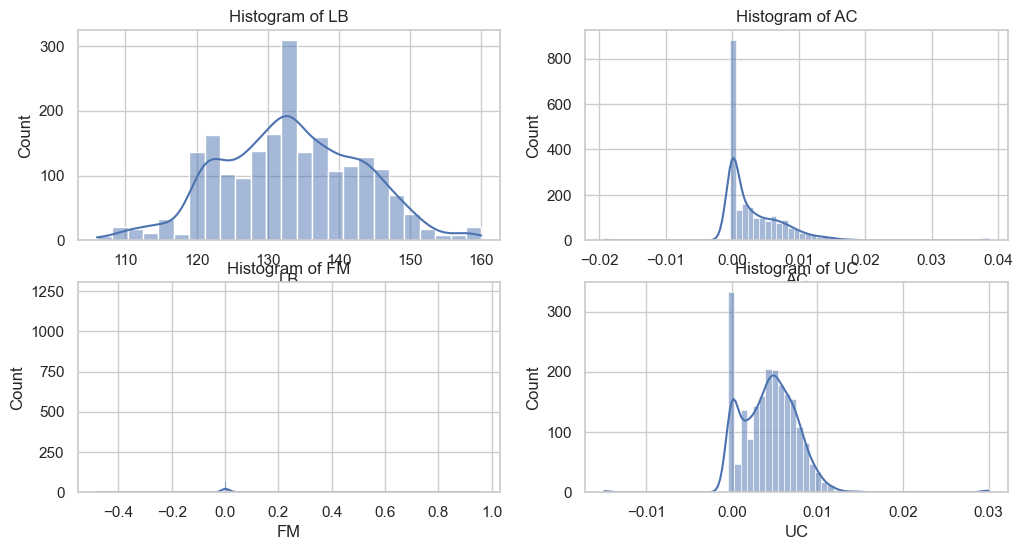

In [26]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
for i, col in enumerate(['LB', 'AC', 'FM', 'UC']):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

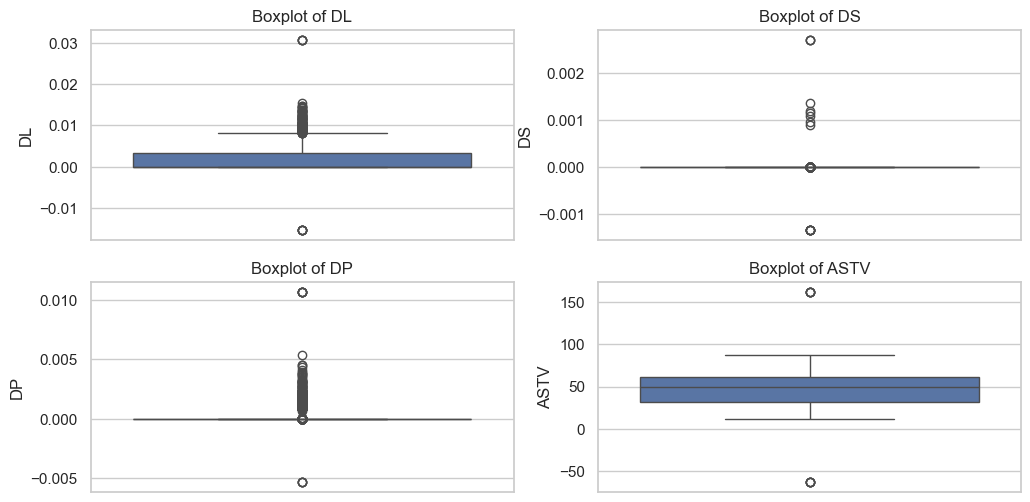

In [28]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(['DL', 'DS', 'DP', 'ASTV']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot of {col}')

Text(0.5, 1.0, 'Correlation Heatmap')

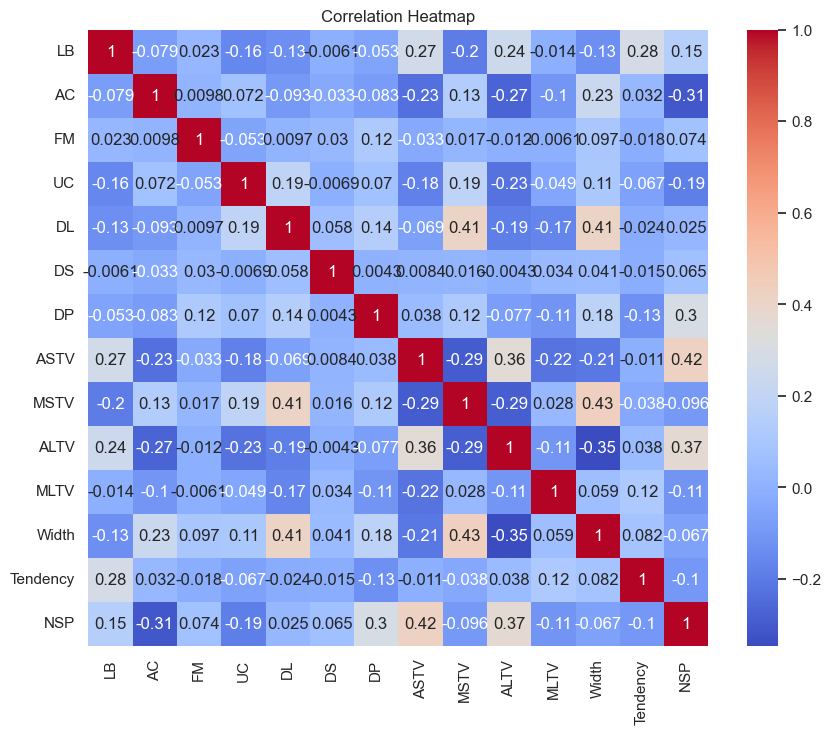

In [30]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

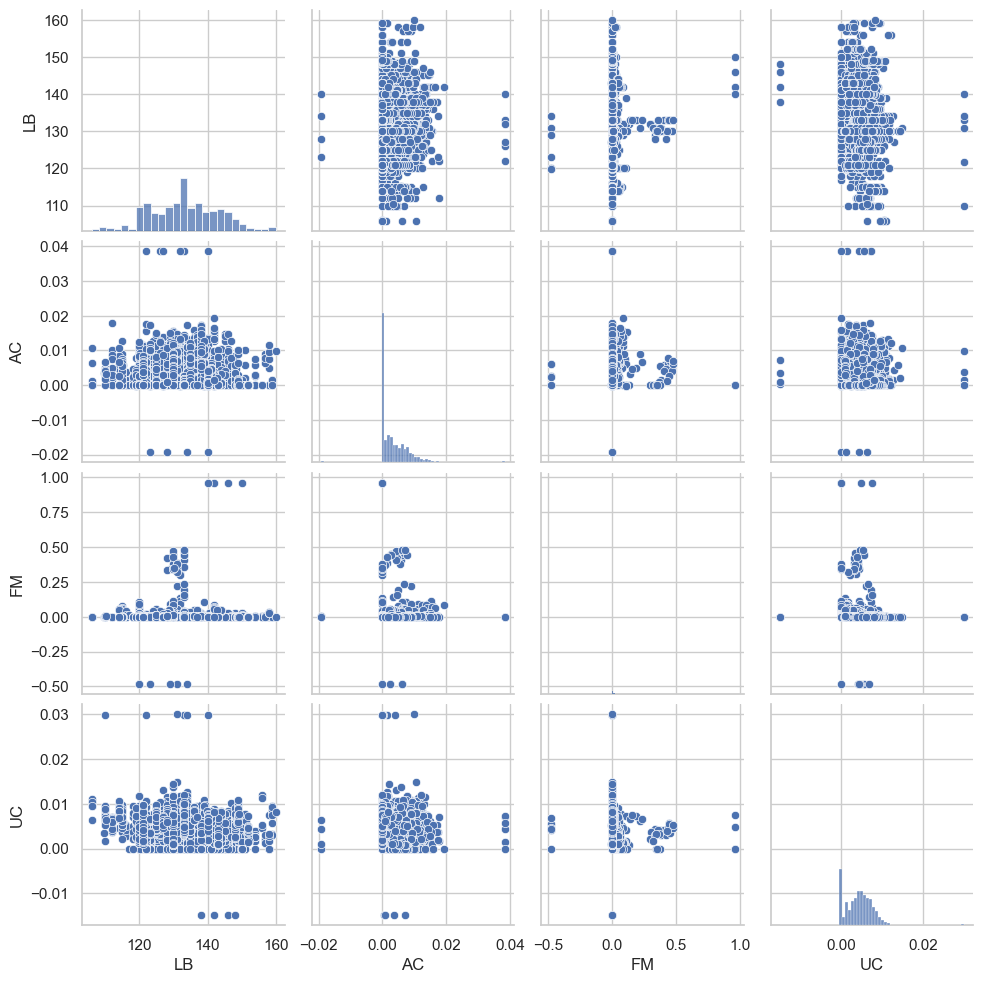

In [32]:
# Pair plots for selected columns
sns.pairplot(df[['LB', 'AC', 'FM', 'UC']])

Text(0.5, 1.0, 'Violin Plots of Variability Measures')

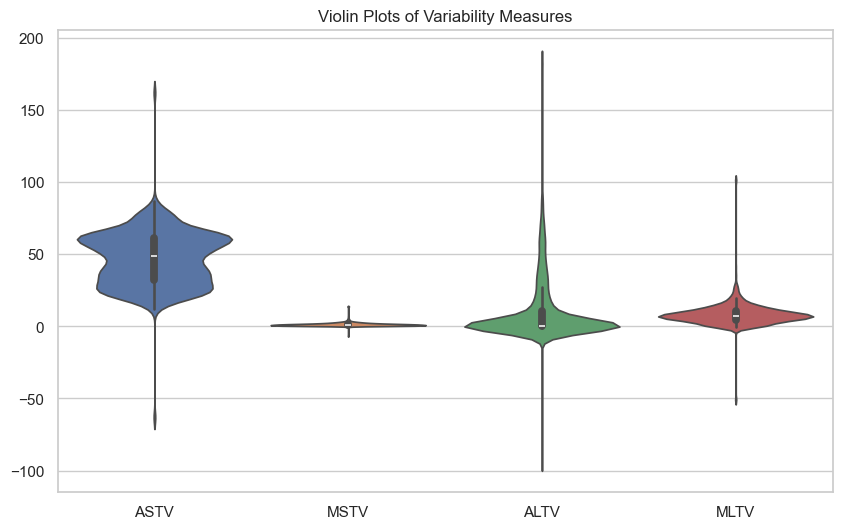

In [34]:
# Violin plots to check distribution and spread of data
plt.figure(figsize=(10, 6))
sns.violinplot(data=df[['ASTV', 'MSTV', 'ALTV', 'MLTV']])
plt.title("Violin Plots of Variability Measures")